In [1]:
from manim import*
_RF = '-v WARNING --disable_caching -qm'
config.media_width = '100%'
config.media_embed = True

Manim Community v0.19.0

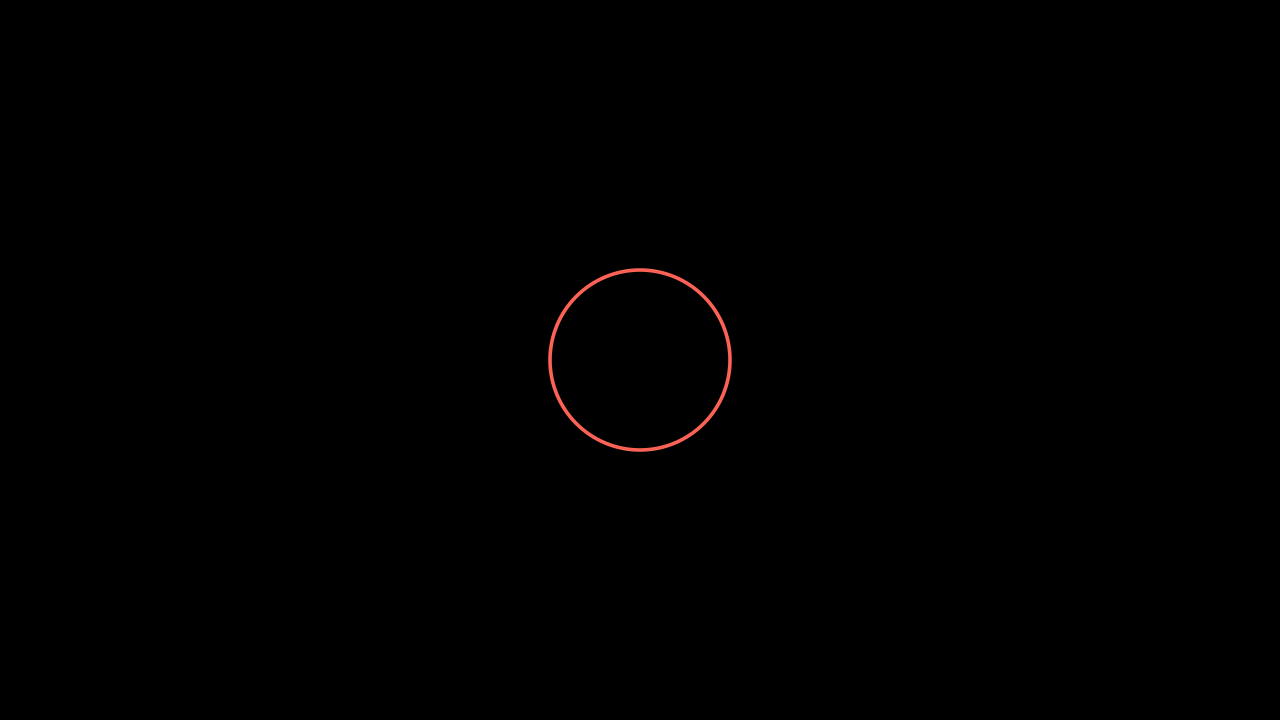

In [2]:
class Test(Scene):
    def construct(self):
        self.add(Circle())
%manim $_RF Test

In [3]:
# 这里打算封装一下树

# 对于[1,2,3,4]全排列算法而言,是一颗非常宏大的树
# 我们只需要动态展示根节点为1的树就好了,其他的节点逻辑跟
# 第一棵树的动画效果是一样的，我们不需要重复展示
# 所以在连线方面，我们可以按照之前的思想去连线,不用考虑太多

# 所以整个类，打算是
# get_TreeNode() 用于获取所有节点grps
# get_Branch() 用于获取所有节点连线
# get_animation()

In [4]:
class PermutationTree:
    
    def __init__(
            self,
    ):
        pass

    def get_TreeNode():
        pass
    def get_Branch():
        pass
    def get_animation():
        pass

In [188]:
from typing import Optional
class PermutationTree:

    ans_list = []
    index = 0

    def __init__(self, scene:Optional[Scene] = None,  per_list = None):
        
        self.scene = scene
        self.camera_frame = self.scene.camera.frame
        if per_list is None:
            per_list = [1, 2, 3, 4]
        self.per_list = per_list
        # 存储所有全排列数的信息,也就是树的结点信息
        self.tree_node_info = []
        self.information = {}

        self._find_remaining_per(self.per_list, [])
        self._divide_info()

    def _find_remaining_per(self,origin_list:list, excessive_list: list):
        if len(origin_list) == 0:
            return 
              
        for data in origin_list:
            temp_list = origin_list.copy()
            temp_list.remove(data)
            excessive_list.append(data)
            self.tree_node_info.append(data)
            self._find_remaining_per(temp_list, excessive_list)
            excessive_list.remove(data)

    def _divide_info(self):
        # 很可惜, 这里有个算法逻辑问题无法解决
        # 下面获取的是先序遍历结果
        # 而我需要的是层次遍历结果
        # 怎么转化节点信息呢?
        # 所以这棵树还是自己构想出来的, 
        # 并不是真正通过写的算法实现的.

        # Ok, 有了新想法了, 不过我们先将这部分给完成, 再去弄我们自己的想法吧

        # self._root1 = self.tree_node_info[:16]
        # self._root2 = self.tree_node_info[16:32]
        # self._root3 = self.tree_node_info[32:48]
        # self._root4 = self.tree_node_info[48:64]
        self._root1 = [1, 2, 3, 4, 3, 4, 2, 4, 2, 3, 4, 3, 4, 2, 3, 2]
        self._root2 = [2, 1, 3, 4, 3, 4, 1, 4, 1, 3, 4, 3, 4, 1, 3, 1]
        self._root3 = [3, 1, 2, 4, 2, 4, 1, 4, 1, 2, 4, 2, 4, 1, 2, 1]
        self._root4 = [4, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 2, 3, 1, 2, 1]
    
    def get_tree_node_info(self):
        return self.tree_node_info

    def get_all_root_info(self):
        return (self._root1, self._root2, self._root3, self._root4)
    
    def get_TreeNode(self, treeInfo:list):

        mobject_list = []
        for data in treeInfo:
            mobject_list.append(LabeledDot(f"{data}"))
        self.grps1 = VGroup(*mobject_list[:1]).arrange(RIGHT,)
        self.grps2 = VGroup(*mobject_list[1:4]).arrange(RIGHT, buff = 1.2)
        self.grps3 = VGroup(*mobject_list[4:10]).arrange(RIGHT, buff = 0.4)
        self.grps4 = VGroup(*mobject_list[-6:]).arrange(RIGHT, buff = 0.4)
        self.grps = VGroup(self.grps1, self.grps2, self.grps3, self.grps4).arrange(DOWN,buff = 0.8)
        self.grps.height = config.frame_height - 1

        self._set_information()
        return self.grps
    
    def _set_information(self):
        self.information[0] = self.grps[0][0]
        self.information[1] = self.grps[1][0]
        self.information[2] = self.grps[2][0]
        self.information[3] = self.grps[3][0]
        self.information[4] = self.grps[2][1]
        self.information[5] = self.grps[3][1]
        self.information[6] = self.grps[1][1]
        self.information[7] = self.grps[2][2]
        self.information[8] = self.grps[3][2]
        self.information[9] = self.grps[2][3]
        self.information[10] = self.grps[3][3]
        self.information[11] = self.grps[1][2]
        self.information[12] = self.grps[2][4]
        self.information[13] = self.grps[3][4]
        self.information[14] = self.grps[2][5]
        self.information[15] = self.grps[3][5]

    def get_Branch(self):
        line_grps1 = VGroup(*[
            Line(self.grps1.get_center(), dot.get_center()).set_color(MAROON).set_stroke(width = 2)
            for dot in self.grps2
        ])
        line_grps2 = VGroup(*[
            Line(self.grps2[i].get_center(), self.grps3[j].get_center()).set_color(MAROON).set_stroke(width=2)
            for j in range(6) 
            for i in range(3)
            if (j == 0 or j == 1) and i == 0 or (j == 2 or j == 3) and i == 1 or (j == 4 or j ==  5) and i == 2
        ])
        line_grps3 = VGroup(*[
            Line(self.grps3[i].get_center(), self.grps4[i].get_center()).set_color(MAROON).set_stroke(width=2)
            for i in range(6)
        ])
        line_grps = VGroup(line_grps1, line_grps2, line_grps3)
        return line_grps
    
    def _find_remaining_per_animation(self, origin_list:list, excessive_list:list):
        if len(origin_list) == 0:
            return 
        
        for data in origin_list:
            PermutationTree.ans_list.append(data)
            temp_list = origin_list.copy()
            temp_list.remove(data)
            pair = (PermutationTree.index,data)
            excessive_list.append(pair)

            if len(excessive_list) and PermutationTree.index > 0:
                line = Line(self.information[excessive_list[len(excessive_list) - 2][0]].get_center(),self.information[PermutationTree.index].get_center())\
                        .set_color(MAROON).set_stroke(width = 2)
                line.set_length(np.linalg.norm(line.get_vector()) - self.information[PermutationTree.index].height/2 - self.information[excessive_list[len(excessive_list) - 2][0]].height/2)
                if self.iszoomed:
                    self.scene.play(
                        self.camera_frame.animate.move_to(self.information[PermutationTree.index].get_center()), 
                        run_time = 1.5
                    )
                # print(line.width)
                self.scene.play(
                    Create(line),
                    Create(self.information[PermutationTree.index],), 
                    run_time = 2
                )
                
            else:
                self.scene.play(
                    Create(self.information[PermutationTree.index],), 
                    run_time = 2
                )
            self.scene.wait()
            PermutationTree.index += 1
            self._find_remaining_per_animation(temp_list, excessive_list)
            excessive_list.remove(pair)
            if len(PermutationTree.ans_list) == 16:
                # if self.iszoomed:
                #     self.scene.play(Restore(self.camera_frame), run_time = 2)
                break
    def _reset(self):
        self.per_list.clear()
        self.per_list.extend([1, 2, 3, 4])
        PermutationTree.ans_list.clear()
        PermutationTree.index = 0
        self.scene.wait()
        self.scene.clear()
    def get_animation(self, root = 1, iszoomed = True):
        # 这里非常有意思, 写出来大家思考一下.
        # 我初始传入的列表是[1, 2, 3, 4]
        # 想法是只画以1为节点的树
        # 所以上面我有len(PermutationTree.ans_list) == 16: break
        # 就是产生16个节点后,就画完了
        # 现在我想画以2为节点、3为节点、4为节点的树, 如何弄呢?
        # 大家思考一下, 很有意思, 看你是全面理解全排列回溯解法
            
        self.iszoomed = iszoomed

        if root > 4 and root < 1:
            print("非法!")
        if root != 1:
            self.per_list.insert(0, self.per_list.pop(root - 1))

        if self.iszoomed:
            self.camera_frame.save_state()
            self.camera_frame.set(height = self.information[0].height + 3.6).move_to(self.information[0].get_center())
            
        self._find_remaining_per_animation(self.per_list, [])
        
        if self.iszoomed:
            self.scene.play(Restore(self.camera_frame), run_time = 2)

        self._reset()


In [190]:
class Test(MovingCameraScene):
    def construct(self):
        p = PermutationTree(self)
        p.get_TreeNode(p._root3)
        p.get_animation(3)
        
%manim $_RF Test

Manim Community v0.19.0

In [165]:
class Test(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        grps = VGroup(circle, square).arrange(UP)
        print(grps.submobjects)
        self.play(Transform(circle, square))
        triangle = Triangle().shift(RIGHT)
        print(self.mobjects)
        self.play(Transform(circle, triangle))
        print(grps.submobjects)
        print(self.mobjects)
        self.clear()
        print(self.mobjects)
        self.play(Transform(circle, square))
%manim $_RF Test

Manim Community v0.19.0

[Circle, Square]


[Circle]


[Circle, Square]
[Circle]
[]
